In [98]:
import time, datetime
import pandas as pd

features = pd.read_csv('features.csv')  # 读取训练数据
print(features.shape)
features = features[["Icao24","start","end","start_lon","end_lon","start_lat","end_lat"]]

airports = pd.read_csv('airports.csv')
airports2 = airports[-airports.type.isin(["heliport","closed"])]
airports3 = airports2[airports.continent.isin(["EU"])]
#airports[["ident","name","latitude_deg","longitude_deg"]]
airports3 = airports3[["ident","name","latitude_deg","longitude_deg"]]
airports3.reset_index(drop=True, inplace=True)
airports3

(4960, 12)


/Users/yimingxu/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,ident,name,latitude_deg,longitude_deg
0,AT-0002,Scalaria Airchallenge Water Landing Area,47.734705,13.443832
1,AT-0009,Ameis Airstrip,48.657837,16.540234
2,BA-0001,Sport airfield Ciljuge,44.438152,18.685614
3,BA-0002,Sportski Aerodrom Zalužani,44.848200,17.222826
4,BA-0003,Brod Airstrip,44.846235,18.761888
...,...,...,...,...
6727,XPLO,Plockton Airstrip,57.335499,-5.673080
6728,XRWL,Lebyazhye Air Base,50.201698,45.208302
6729,XUBS,Smolensk North Airport,54.824000,32.025000
6730,XWPD,Sosnovka Airfield,53.261002,45.277000


In [56]:
import math
def rad(number):
    return number*math.pi/180
    
def distance(lat1, lng1, lat2, lng2):
    EARTH_RADIUS = 6378.137
    radLat1 = rad(lat1)
    radLat2 = rad(lat2)
    a = rad(lat1) - rad(lat2)
    b = rad(lng1) - rad(lng2)
    distance = EARTH_RADIUS * 2 * math.asin(math.sqrt(math.pow(math.sin(a / 2), 2) + math.cos(radLat1) * math.cos(radLat2) * math.pow(math.sin((b) / 2), 2)))
    return distance


In [101]:

for index1 in features.index:
    arr = []
    arr2 = []
    lat1 = features.loc[index1]["start_lat"]
    lng1 = features.loc[index1]["start_lon"]
    lat1_ = features.loc[index1]["end_lat"]
    lng1_ = features.loc[index1]["end_lon"]
    for index2 in airports3.index:
        lat2 = airports3.loc[index2]["latitude_deg"]
        lng2 = airports3.loc[index2]["longitude_deg"]
        arr.append(distance(lat1, lng1, lat2, lng2))
        arr2.append(distance(lat1_, lng1_, lat2, lng2))
        
    start_index = arr.index(max(arr, key = abs))
    name = airports3.loc[start_index]["name"]
    ap_lat = airports3.loc[start_index]["latitude_deg"]
    ap_lon = airports3.loc[start_index]["longitude_deg"]
    features.loc[index1,'st_name'] = name
    features.loc[index1,'st_ap_lat'] = ap_lat
    features.loc[index1,'st_ap_lon'] = ap_lon
    features.loc[index1,'st_dis'] = arr[start_index]
    
    end_index = arr2.index(max(arr2, key = abs))
    name2 = airports3.loc[end_index]["name"]
    ap_lat2 = airports3.loc[end_index]["latitude_deg"]
    ap_lon2 = airports3.loc[end_index]["longitude_deg"]
    features.loc[index1,'ed_name'] = name2
    features.loc[index1,'ed_ap_lat'] = ap_lat2
    features.loc[index1,'ed_ap_lon'] = ap_lon2
    features.loc[index1,'ed_dis'] = arr2[end_index]
     

In [102]:
features


,Icao24,start,end,start_lon,end_lon,start_lat,end_lat,st_name,st_ap_lat,st_ap_lon,st_dis,ed_name,ed_ap_lat,ed_ap_lon,ed_dis
0,300068,1.474188e+09,1.474199e+09,-4.611012,12.207791,39.989722,41.974244,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10228.907638,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,9405.373690
1,34134e,1.474530e+09,1.474547e+09,-3.530107,-3.504826,40.439696,40.442629,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10148.902141,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10147.809086
2,3423c4,1.474455e+09,1.474461e+09,-9.162717,-3.529175,38.731064,40.438751,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10491.084844,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10148.970832
3,3423c6,1.474188e+09,1.474213e+09,-3.529724,-3.526112,40.439255,40.435646,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10148.935873,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10149.196519
4,34250c,1.474200e+09,1.474217e+09,-3.509632,-3.527222,40.447470,40.436920,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10147.458271,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10149.099334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,4408b1,1.474269e+09,1.474291e+09,12.256974,0.063477,41.856839,51.885495,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,9414.358801,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,8868.006457
4956,484160,1.474728e+09,1.474731e+09,4.792023,2.371240,52.253677,49.016434,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,8689.216379,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,9087.899995
4957,495287,1.474563e+09,1.474577e+09,12.257309,-9.161316,41.856079,38.733789,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,9414.416232,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,10490.758731
4958,4b1618,1.474441e+09,1.474449e+09,2.405654,8.477220,49.018250,47.525133,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,9086.625449,Yuzhno-Kurilsk Mendeleyevo Airport,43.959275,145.684805,9024.270867


In [103]:
features.to_csv('./new_feature.csv',encoding='utf-8')

In [8]:
import pandas as pd

oneday = pd.read_csv('./../data/for_visualization_one_day.csv')
oneday

,Icao24,timeAtServer,lon,lat,alt,cls
0,300092,14742161.0,12.256207,41.858608,400.000000,13
1,300092,14742162.0,12.271517,41.933237,395.653130,13
2,300092,14742163.0,12.286826,42.007866,391.306261,13
3,300092,14742164.0,12.302136,42.082495,386.959391,13
4,300092,14742165.0,12.317445,42.157124,382.612521,13
...,...,...,...,...,...,...
142262,e4818b,14742078.0,-0.135325,51.367264,6075.000000,0
142263,e4818b,14742079.0,0.002060,51.414619,5175.000000,0
142264,e4818b,14742080.0,-0.065101,51.477814,4400.000000,0
142265,e4818b,14742081.0,-0.206662,51.478180,2650.000000,0


In [9]:
timearr = []
for index in oneday.index:
    oneday.loc[index, "timeAtServer"] = int(oneday.loc[index]["timeAtServer"])*100
    #oneday.loc[index, "lon"] = format(oneday.loc[index]["lon"], '.3f')
    #oneday.loc[index, "lat"] = format(oneday.loc[index]["lat"], '.3f')
    #oneday.loc[index, "alt"] = int(oneday.loc[index]["alt"])

In [11]:
oneday
for index in oneday.index:
    #oneday.loc[index, "timeAtServer"] = int(oneday.loc[index]["timeAtServer"])*100
    oneday.loc[index, "lon"] = format(oneday.loc[index]["lon"], '.3f')

In [12]:
for index in oneday.index:
    #oneday.loc[index, "timeAtServer"] = int(oneday.loc[index]["timeAtServer"])*100
    #oneday.loc[index, "lon"] = format(oneday.loc[index]["lon"], '.3f')
    oneday.loc[index, "lat"] = format(oneday.loc[index]["lat"], '.3f')

In [13]:
for index in oneday.index:
    #oneday.loc[index, "timeAtServer"] = int(oneday.loc[index]["timeAtServer"])*100
    #oneday.loc[index, "lon"] = format(oneday.loc[index]["lon"], '.3f')
    #oneday.loc[index, "lat"] = format(oneday.loc[index]["lat"], '.3f')
    oneday.loc[index, "alt"] = int(oneday.loc[index]["alt"])

In [14]:
oneday

,Icao24,timeAtServer,lon,lat,alt,cls
0,300092,1.474216e+09,12.256,41.859,400.0,13
1,300092,1.474216e+09,12.272,41.933,395.0,13
2,300092,1.474216e+09,12.287,42.008,391.0,13
3,300092,1.474216e+09,12.302,42.082,386.0,13
4,300092,1.474216e+09,12.317,42.157,382.0,13
...,...,...,...,...,...,...
142262,e4818b,1.474208e+09,-0.135,51.367,6075.0,0
142263,e4818b,1.474208e+09,0.002,51.415,5175.0,0
142264,e4818b,1.474208e+09,-0.065,51.478,4400.0,0
142265,e4818b,1.474208e+09,-0.207,51.478,2650.0,0


In [15]:
import json
import pandas as pd
 
#data = './test.csv'
#data_csv = pd.read_csv(data)
f = open("./../data/oneday.json", mode="a")
json_dict = []
for index, row in oneday.iterrows():
    dict_row = row.to_dict()
    json_dict.append(dict_row)
    
f.write(json.dumps(json_dict, ensure_ascii=False))

15859595

In [120]:
timearr.sort()

In [121]:
timearr

[1474157000.0,
 1474157100.0,
 1474157200.0,
 1474157300.0,
 1474157400.0,
 1474157500.0,
 1474157600.0,
 1474157700.0,
 1474157800.0,
 1474157900.0,
 1474158000.0,
 1474158100.0,
 1474158200.0,
 1474158300.0,
 1474158400.0,
 1474158500.0,
 1474158600.0,
 1474158700.0,
 1474158800.0,
 1474158900.0,
 1474159000.0,
 1474159100.0,
 1474159200.0,
 1474159300.0,
 1474159400.0,
 1474159500.0,
 1474159600.0,
 1474159700.0,
 1474159800.0,
 1474159900.0,
 1474160000.0,
 1474160100.0,
 1474160200.0,
 1474160300.0,
 1474160400.0,
 1474160500.0,
 1474160600.0,
 1474160700.0,
 1474160800.0,
 1474160900.0,
 1474161000.0,
 1474161100.0,
 1474161200.0,
 1474161300.0,
 1474161400.0,
 1474161500.0,
 1474161600.0,
 1474161700.0,
 1474161800.0,
 1474161900.0,
 1474162000.0,
 1474162100.0,
 1474162200.0,
 1474162300.0,
 1474162400.0,
 1474162500.0,
 1474162600.0,
 1474162700.0,
 1474162800.0,
 1474162900.0,
 1474163000.0,
 1474163100.0,
 1474163200.0,
 1474163300.0,
 1474163400.0,
 1474163500.0,
 147416360

In [122]:
timearr[0]

1474157000.0

In [123]:
timearr[-1]

1474242500.0

In [126]:
int(1474242519 /100)*100

1474242500

In [23]:
import json

with open('./../data/point.json', 'r') as f:
    point = json.load(f) 
    
arr = []
for i in point:
    if i['time'] not in arr:
        arr.append(i['time'])

In [24]:
arr.sort()

In [25]:
arr[0]

1474164141

In [26]:
arr[-1]

1474243199

In [27]:
point

[{'Icao24': '300172',
  'time': 1474234920,
  'lon': 8.746523973418446,
  'lat': 45.5826416015625,
  'type': 0},
 {'Icao24': '300172',
  'time': 1474172096,
  'lon': 10.85174560546875,
  'lat': 45.37619018554688,
  'type': 0},
 {'Icao24': '300189',
  'time': 1474237031,
  'lon': 10.735212053571429,
  'lat': 45.2900390625,
  'type': 0},
 {'Icao24': '300189',
  'time': 1474171546,
  'lon': 10.851026262555804,
  'lat': 45.37504577636719,
  'type': 0},
 {'Icao24': '3001c5',
  'time': 1474217712,
  'lon': 8.786985816025153,
  'lat': 45.43768413996292,
  'type': 0},
 {'Icao24': '3001c5',
  'time': 1474172499,
  'lon': 8.729667663574219,
  'lat': 45.564678644729874,
  'type': 0},
 {'Icao24': '3004b2',
  'time': 1474230728,
  'lon': 10.73906875238186,
  'lat': 45.28159448655985,
  'type': 0},
 {'Icao24': '3004b2',
  'time': 1474171692,
  'lon': 10.86253096417683,
  'lat': 45.37125409659693,
  'type': 0},
 {'Icao24': '3004c2',
  'time': 1474226812,
  'lon': 8.753013610839844,
  'lat': 45.559138

In [28]:
import time, datetime
import pandas as pd

airports = pd.read_csv('Icao24_cls_airports_se.csv')

In [29]:
airports

,Icao24,cls,MinDistance_s,Name_s,MinDistance_e,Name_e
0,4ca8e4,27,8.478415,Brussels South Charleroi Airport,11.375740,Flugplatz Weser-Wümme
1,406b41,0,3.007094,London Gatwick Airport,6.964719,Redhill Aerodrome
2,3443d5,47,9.135883,Langeveld Glider Field,5.808347,Leonardo da Vinci–Fiumicino Airport
3,4ca99b,17,5.565975,Milano Linate Airport,5.565975,Milano Linate Airport
4,4ca8e6,0,2.966456,London Luton Airport,2.342307,Rush Green Airstrip
...,...,...,...,...,...,...
4920,4841d5,86,11.323323,Aeroclub Nistelrode,12.553285,Aeroclub Nistelrode
4921,470d4a,18,11.474056,Mirkovac Airstrip,7.075669,Campo di Volo Palosco
4922,400cd0,8,6.569001,Redhill Aerodrome,8.905559,Milano Linate Airport
4923,424597,9,106.380577,Aérodrome de Vendays-Montalivet,8.439580,Mönchengladbach Airport


In [32]:
features = pd.read_csv('features_2016.csv')

In [33]:
features

,Unnamed: 0,Icao24,cls,start,end,start_lon,end_lon,start_lat,end_lat,max_alt,...,time,avg_speed,Callsign_t,startarea,endarea,start_sunrise,start_sunset,end_sunrise,end_sunset,type
0,0,02007d,12,1.474452e+09,1.474477e+09,-3.530856,4.538244,40.440348,50.902405,122300,...,24843.600294,0.053179,RAM,0.0,0.0,0.615622,0.111513,-0.067395,-0.571712,0.0
1,1,343141,46,1.474522e+09,1.474536e+09,-3.510620,4.712143,40.448273,52.364594,36025,...,13228.438530,0.110881,IBS,1.0,0.0,0.432975,-0.071268,0.619252,0.114932,1.0
2,2,344417,41,1.474397e+09,1.474403e+09,-9.158081,-3.529670,38.740121,40.439184,21100,...,6645.153990,0.078018,IBE,0.0,1.0,-0.026547,-0.530446,0.055215,-0.448894,0.0
3,3,344449,80,1.474610e+09,1.474622e+09,-3.529483,12.328884,40.438998,45.487244,35025,...,12070.848719,0.116451,IBE,1.0,0.0,0.450755,-0.053622,0.604370,0.100371,0.0
4,4,3c49c5,39,1.474466e+09,1.474557e+09,10.025832,7.070266,53.595871,49.213394,38050,...,91097.831000,0.005809,BER,0.0,0.0,0.820757,0.315952,0.862966,0.358608,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,4920,471f66,22,1.474309e+09,1.474352e+09,4.546781,-0.504074,50.487019,51.851139,37050,...,43019.076000,0.008921,WZZ,0.0,1.0,-0.006001,-0.510661,0.495449,-0.008770,0.0
4921,4921,484cb8,87,1.474553e+09,1.474560e+09,4.712193,13.232346,52.366007,52.554337,31000,...,7458.958000,0.077484,KLM,0.0,0.0,0.817890,0.313570,-0.095133,-0.599130,0.0
4922,4922,484f15,83,1.474482e+09,1.474526e+09,4.711685,4.712899,52.359283,52.373874,41000,...,44037.424000,0.000037,KLM,1.0,0.0,0.003925,-0.500395,0.513658,0.009338,0.0
4923,4923,4ca4ea,24,1.474526e+09,1.474538e+09,-3.509766,9.791632,40.447540,45.652039,38000,...,11664.894838,0.105033,RYR,1.0,0.0,0.478492,-0.025751,0.628102,0.123692,0.0


In [42]:
point_list = []
for index in features.index:
    point = dict()
    point["Icao24"] = features.loc[index]["Icao24"]
    point["time"] = int(features.loc[index]["start"])
    point["lon"] = format(features.loc[index]["start_lon"], '.3f')
    point["lat"] = format(features.loc[index]["start_lat"], '.3f')
    point["type"] = features.loc[index]["type"]
    point_list.append(point)
    
for index in features.index:
    point = dict()
    point["Icao24"] = features.loc[index]["Icao24"]
    point["time"] = int(features.loc[index]["end"])
    point["lon"] = format(features.loc[index]["end_lon"], '.3f')
    point["lat"] = format(features.loc[index]["end_lat"], '.3f')
    point["type"] = features.loc[index]["type"]
    point_list.append(point)

In [43]:
point_list

[{'Icao24': '02007d',
  'time': 1474451686,
  'lon': '-3.531',
  'lat': '40.440',
  'type': 0.0},
 {'Icao24': '343141',
  'time': 1474522277,
  'lon': '-3.511',
  'lat': '40.448',
  'type': 1.0},
 {'Icao24': '344417',
  'time': 1474396622,
  'lon': '-9.158',
  'lat': '38.740',
  'type': 0.0},
 {'Icao24': '344449',
  'time': 1474610188,
  'lon': '-3.529',
  'lat': '40.439',
  'type': 0.0},
 {'Icao24': '3c49c5',
  'time': 1474466218,
  'lon': '10.026',
  'lat': '53.596',
  'type': 0.0},
 {'Icao24': '3c56e9',
  'time': 1474618494,
  'lon': '10.024',
  'lat': '53.598',
  'type': 0.0},
 {'Icao24': '3c65c3',
  'time': 1474542867,
  'lon': '10.039',
  'lat': '53.580',
  'type': 0.0},
 {'Icao24': '4008',
  'time': 1474643861,
  'lon': '-0.083',
  'lat': '51.158',
  'type': 0.0},
 {'Icao24': '4010eb',
  'time': 1474219365,
  'lon': '-6.631',
  'lat': '58.339',
  'type': 0.0},
 {'Icao24': '405b64',
  'time': 1474477639,
  'lon': '-9.161',
  'lat': '38.735',
  'type': 0.0},
 {'Icao24': '4066ce',


In [50]:
with open('point2016.json', 'w') as f:
    json.dump(point_list,f)

In [45]:
timearr = []
for index in features.index:
    if int(features.loc[index]["start"]) not in timearr:
        timearr.append(int(features.loc[index]["start"]))
    if int(features.loc[index]["end"]) not in timearr:
        timearr.append(int(features.loc[index]["end"]))

In [47]:
timearr.sort()

In [48]:
timearr[0]

1474157029

In [49]:
timearr[-1]

1474761429

In [78]:
_date = 1474157029
dateArray = datetime.datetime.fromtimestamp(_date)
otherStyleTime = dateArray.strftime("%Y--%m--%d %H:%M:%S")
otherStyleTime

'2016--09--18 02:03:49'

In [ ]:
189212345

In [74]:
import time, datetime
import pandas as pd


airports = pd.read_csv('airports.csv')
airports2 = airports[-airports.type.isin(["heliport","closed","seaplane_base","small_airport","balloonport"])]
airports3 = airports2[airports.continent.isin(["EU"])]
airports3 = airports3[-airports.iso_country.isin(["RU"])]
airports[["ident","name","latitude_deg","longitude_deg"]]
airports3 = airports3[["ident","name","latitude_deg","longitude_deg"]]
airports3.reset_index(drop=True, inplace=True)
airports3

/Users/yimingxu/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/yimingxu/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ident,name,latitude_deg,longitude_deg
0,BG-JAM,Bezmer Air Base,42.454899,26.352200
1,BIAR,Akureyri Airport,65.660004,-18.072701
2,BIEG,Egilsstaðir Airport,65.283302,-14.401400
3,BIHN,Hornafjörður Airport,64.295601,-15.227200
4,BIHU,Húsavík Airport,65.952301,-17.426001
...,...,...,...,...
904,UMMG,Hrodna Airport,53.602001,24.053801
905,UMMS,Minsk National Airport,53.888071,28.039964
906,UMNB,Babruisk Air Base,53.105000,29.205000
907,UMOO,Mogilev Airport,53.954899,30.095100


In [75]:
airports3.to_json(orient="records",force_ascii=False)

airports_list = []
for index in airports3.index:
    airports = dict()
    airports["ident"] = airports3.loc[index]["ident"]
    airports["name"] = airports3.loc[index]["name"]
    airports["lon"] = format(airports3.loc[index]["longitude_deg"], '.3f')
    airports["lat"] = format(airports3.loc[index]["latitude_deg"], '.3f')
    airports_list.append(airports)

In [76]:
with open('airportspoint.json', 'w') as f:
    json.dump(airports_list,f)

In [91]:
import json
import pandas as pd
 
data = './100_with_callsign_type_for_vis_one_year.csv'
data_csv = pd.read_csv(data)
for index in data_csv.index:
    if data_csv.loc[index]["type"] != 1.0:
        data_csv.loc[index,"type"] = 0.0
        

f = open("./../data/100_2016.json", mode="a")
json_dict = []
for index, row in data_csv.iterrows():
    dict_row = row.to_dict()
    json_dict.append(dict_row)
    
f.write(json.dumps(json_dict, ensure_ascii=False))

20368073

In [92]:
arr = []
for index in data_csv.index:
    if data_csv.loc[index]["timeAtServer"] not in arr:
        arr.append(data_csv.loc[index]["timeAtServer"])
    

In [93]:
arr.sort()
print(arr[0])
print(arr[-1])

1474157000.0
1474242500.0


# airports_for_vis_with_typeNotNull to json

In [94]:
import time, datetime
import pandas as pd

airports_csv = pd.read_csv('airports_for_vis_with_typeNotNull.csv') 

In [110]:
all_airports_list = []
airports_list = []
cargo_list = []
for index in airports_csv.index:
    if airports_csv.loc[index]["Name_s"] not in airports_list:
        airports_list.append(airports_csv.loc[index]["Name_s"])
    if airports_csv.loc[index]["Name_e"] not in airports_list:
        airports_list.append(airports_csv.loc[index]["Name_e"])
    all_airports_list.append(airports_csv.loc[index]["Name_s"])
    all_airports_list.append(airports_csv.loc[index]["Name_e"])
    if airports_csv.loc[index]["type"] == 1:
        if airports_csv.loc[index]["Name_s"] not in cargo_list:
            cargo_list.append(airports_csv.loc[index]["Name_s"])
        if airports_csv.loc[index]["Name_e"] not in cargo_list:
            cargo_list.append(airports_csv.loc[index]["Name_s"])

In [111]:
len(airports_list)

197

In [171]:
airports_link = airports_csv[["Name_s","Name_e"]]
airports_link

,Name_s,Name_e
0,Brussels South Charleroi Airport,Flugplatz Weser-Wümme
1,London Luton Airport,Rush Green Airstrip
2,Amsterdam Airport Schiphol,Enghien Moisselles Airfield
3,Milano Linate Airport,London Heathrow Airport
4,Humberto Delgado Airport (Lisbon Portela Airport),Nice-Côte d'Azur Airport
...,...,...
2495,London Gatwick Airport,London Gatwick Airport
2496,Enghien Moisselles Airfield,Redhill Aerodrome
2497,Hamburg Helmut Schmidt Airport,Hamburg Helmut Schmidt Airport
2498,London Stansted Airport,Hunsdon Airfield


In [116]:
from collections import Counter
len(all_airports_list)
count = Counter(all_airports_list)


197

In [173]:
ports_json = []
for i in count:
    ports = dict()
    ports["name"] = i
    ports["size"] = count[i]
    importlist = []
    for index in airports_link.loc[airports_link['Name_s']==i].index:
        importlist.append(airports_link.loc[airports_link['Name_s']==i].loc[index]["Name_e"])
    ports["imports"] = importlist
    ports_json.append(ports)

In [175]:
f = open("./../data/airports_link.json", mode="a")
f.write(json.dumps(ports_json, ensure_ascii=False))

82656

In [164]:
airports_link = airports_csv[["Name_s","Name_e"]]

In [145]:
airports_link_g = airports_link.groupby(['Name_s'])
airports_link_group = pd.DataFrame(airports_link_g)

In [176]:
airports_csv

,Icao24,cls,MinDistance_s,Name_s,s_airports_lat,s_airports_lon,MinDistance_e,Name_e,e_airports_lat,e_airports_lon,Callsign,type
0,4ca8e4,27,8.478415,Brussels South Charleroi Airport,50.46,4.45,11.375740,Flugplatz Weser-Wümme,53.05,9.21,RYR,0
1,4ca8e6,0,2.966456,London Luton Airport,51.87,-0.37,2.342307,Rush Green Airstrip,51.90,-0.25,RYR,0
2,392af2,72,6.522824,Amsterdam Airport Schiphol,52.31,4.76,4.946547,Enghien Moisselles Airfield,49.05,2.35,AFR,0
3,4008b4,79,6.679169,Milano Linate Airport,45.45,9.28,3.467181,London Heathrow Airport,51.47,-0.46,BAW,0
4,4b16b9,22,5.830479,Humberto Delgado Airport (Lisbon Portela Airport),38.78,-9.14,1.958041,Nice-Côte d'Azur Airport,43.66,7.22,SWR,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,400e5a,27,7.330667,London Gatwick Airport,51.15,-0.19,7.330667,London Gatwick Airport,51.15,-0.19,EZY,0
2496,406670,73,4.946547,Enghien Moisselles Airfield,49.05,2.35,6.964719,Redhill Aerodrome,51.21,-0.14,EZY,0
2497,3c6755,39,7.766659,Hamburg Helmut Schmidt Airport,53.63,9.99,6.472016,Hamburg Helmut Schmidt Airport,53.63,9.99,EWG,0
2498,a9ab7b,0,4.324742,London Stansted Airport,51.88,0.23,4.277391,Hunsdon Airfield,51.81,0.07,FDX,1


In [179]:
cargo_list
cargo_list_ = {}.fromkeys(cargo_list).keys()
cargo_list_

dict_keys(['Amsterdam Airport Schiphol', 'Adolfo Suárez Madrid–Barajas Airport', 'Aérodrome de Belle Île', 'Leverkusen Airport', 'Enghien Moisselles Airfield', 'Melilla Airport', 'Bunge Private Airport', 'Düsseldorf Airport', 'London Stansted Airport', 'Mönchengladbach Airport', 'Charles de Gaulle International Airport', 'Hamburg Helmut Schmidt Airport', 'Thisted Airport', 'Hunsdon Airfield', 'Essen Mulheim Airport', 'Oslo Airport, Gardermoen', 'Großes Moor Airfield', 'Little Chase Farm Airstrip', 'Frankfurt am Main Airport', 'Berlin Brandenburg Airport', 'Meiersberg Airfield', 'Paris-Le Bourget Airport', 'Cologne Bonn Airport', 'Saint-Yan Airport', 'EuroAirport Basel-Mulhouse-Freiburg Airport', 'Corvo Airport', 'Flores Airport', 'Trøgstad Airfield', 'Flugplatz Merseburg'])

In [180]:
len(cargo_list_)

29

# Hotmap Json

## 2016

In [50]:
import time, datetime
import pandas as pd

airports_volume_csv = pd.read_csv('2016_airports_with_position.csv') 

airports_volume_csv


,Icao24,cls,MinDistance_s,Name_s,s_airports_lat,s_airports_lon,MinDistance_e,Name_e,e_airports_lat,e_airports_lon,Callsign,type,start,end
0,4ca8e4,27,8.478415,Brussels South Charleroi Airport,50.46,4.45,11.375740,Flugplatz Weser-Wümme,53.05,9.21,RYR,0,1.474662e+09,1.474731e+09
1,406b41,0,3.007094,London Gatwick Airport,51.15,-0.19,6.964719,Redhill Aerodrome,51.21,-0.14,MON,0,1.474178e+09,1.474211e+09
2,3443d5,47,9.135883,Langeveld Glider Field,52.30,4.51,5.808347,Leonardo da Vinci–Fiumicino Airport,41.80,12.24,VLG,0,1.474310e+09,1.474322e+09
3,4ca99b,17,5.565975,Milano Linate Airport,45.45,9.28,5.565975,Milano Linate Airport,45.45,9.28,AZA,0,1.474224e+09,1.474266e+09
4,4ca8e6,0,2.966456,London Luton Airport,51.87,-0.37,2.342307,Rush Green Airstrip,51.90,-0.25,RYR,0,1.474178e+09,1.474191e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,4841d5,86,11.323323,Aeroclub Nistelrode,51.68,5.55,12.553285,Aeroclub Nistelrode,51.68,5.55,TRA,0,1.474715e+09,1.474750e+09
4793,470d4a,18,11.474056,Mirkovac Airstrip,45.73,18.79,7.075669,Campo di Volo Palosco,45.60,9.82,BCS,1,1.474438e+09,1.474489e+09
4794,400cd0,8,6.569001,Redhill Aerodrome,51.21,-0.14,8.905559,Milano Linate Airport,45.45,9.28,EZY,0,1.474197e+09,1.474207e+09
4795,424597,9,106.380577,Aérodrome de Vendays-Montalivet,45.38,-1.12,8.439580,Mönchengladbach Airport,51.23,6.50,AFL,0,1.474630e+09,1.474703e+09


In [44]:
point_list = []
for index in airports_volume_csv.index:
    point = dict()
    point["Icao24"] = airports_volume_csv.loc[index]["Icao24"]
    point["time"] = int(airports_volume_csv.loc[index]["start"])
    point["lon"] = airports_volume_csv.loc[index]["s_airports_lon"]
    point["lat"] = airports_volume_csv.loc[index]["s_airports_lat"]
    point["type"] = int(airports_volume_csv.loc[index]["type"])
    point["name"] = airports_volume_csv.loc[index]["Name_s"]
    point_list.append(point)
    point = dict()
    point["Icao24"] = airports_volume_csv.loc[index]["Icao24"]
    point["time"] = int(airports_volume_csv.loc[index]["end"])
    point["lon"] = airports_volume_csv.loc[index]["e_airports_lon"]
    point["lat"] = airports_volume_csv.loc[index]["e_airports_lat"]
    point["type"] = int(airports_volume_csv.loc[index]["type"])
    point["name"] = airports_volume_csv.loc[index]["Name_e"]
    point_list.append(point)
    

In [45]:

f = open("./../data/airportspoint16.json", mode="a")
f.write(json.dumps(point_list, ensure_ascii=False))

1139257

## 2016 Cargo count

In [59]:
count16 = airports_volume_csv[["Callsign","type","end"]]
for index in count16.index:
    _date = count16.loc[index]["end"]
    dateArray = datetime.datetime.fromtimestamp(_date)
    otherStyleTime = dateArray.strftime("%Y-%m-%d %H") + ":00:00"
    count16.loc[index,'end'] = int(time.mktime(time.strptime(otherStyleTime, "%Y-%m-%d %H:%M:%S")))
    print(count16.loc[index,'end'])
    #count16.loc[index,"end"] = time.strftime("%Y%m%d",count16.loc[index]["end"])
count16

/Users/yimingxu/opt/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


1474729200.0
1474210800.0
1474318800.0
1474264800.0
1474189200.0
1474477200.0
1474642800.0
1474473600.0
1474178400.0
1474462800.0
1474196400.0
1474178400.0
1474632000.0
1474545600.0
1474304400.0
1474300800.0
1474182000.0
1474747200.0
1474628400.0
1474254000.0
1474740000.0
1474387200.0
1474189200.0
1474560000.0
1474444800.0
1474660800.0
1474308000.0
1474484400.0
1474383600.0
1474632000.0
1474696800.0
1474185600.0
1474196400.0
1474729200.0
1474668000.0
1474182000.0
1474185600.0
1474405200.0
1474390800.0
1474210800.0
1474398000.0
1474236000.0
1474210800.0
1474639200.0
1474552800.0
1474228800.0
1474531200.0
1474185600.0
1474624800.0
1474480800.0
1474484400.0
1474660800.0
1474628400.0
1474441200.0
1474232400.0
1474182000.0
1474524000.0
1474203600.0
1474722000.0
1474437600.0
1474696800.0
1474196400.0
1474473600.0
1474192800.0
1474477200.0
1474635600.0
1474736400.0
1474207200.0
1474635600.0
1474207200.0
1474452000.0
1474308000.0
1474556400.0
1474455600.0
1474473600.0
1474218000.0
1474560000.0

1474560000.0
1474455600.0
1474365600.0
1474221600.0
1474646400.0
1474282800.0
1474725600.0
1474560000.0
1474203600.0
1474725600.0
1474459200.0
1474484400.0
1474300800.0
1474707600.0
1474304400.0
1474484400.0
1474725600.0
1474293600.0
1474700400.0
1474203600.0
1474300800.0
1474459200.0
1474282800.0
1474300800.0
1474545600.0
1474624800.0
1474632000.0
1474376400.0
1474452000.0
1474354800.0
1474473600.0
1474722000.0
1474657200.0
1474491600.0
1474203600.0
1474322400.0
1474232400.0
1474214400.0
1474693200.0
1474653600.0
1474653600.0
1474610400.0
1474624800.0
1474473600.0
1474398000.0
1474207200.0
1474383600.0
1474693200.0
1474189200.0
1474372800.0
1474632000.0
1474185600.0
1474718400.0
1474725600.0
1474642800.0
1474387200.0
1474297200.0
1474480800.0
1474318800.0
1474466400.0
1474164000.0
1474747200.0
1474488000.0
1474369200.0
1474416000.0
1474722000.0
1474318800.0
1474372800.0
1474200000.0
1474696800.0
1474185600.0
1474722000.0
1474390800.0
1474196400.0
1474182000.0
1474178400.0
1474192800.0

1474448400.0
1474225200.0
1474660800.0
1474434000.0
1474203600.0
1474315200.0
1474538400.0
1474264800.0
1474196400.0
1474628400.0
1474196400.0
1474398000.0
1474372800.0
1474182000.0
1474488000.0
1474563600.0
1474639200.0
1474293600.0
1474164000.0
1474214400.0
1474228800.0
1474455600.0
1474653600.0
1474210800.0
1474632000.0
1474398000.0
1474178400.0
1474185600.0
1474452000.0
1474207200.0
1474567200.0
1474358400.0
1474318800.0
1474455600.0
1474372800.0
1474437600.0
1474660800.0
1474174800.0
1474722000.0
1474405200.0
1474488000.0
1474642800.0
1474236000.0
1474459200.0
1474538400.0
1474452000.0
1474390800.0
1474257600.0
1474293600.0
1474462800.0
1474488000.0
1474722000.0
1474290000.0
1474707600.0
1474196400.0
1474372800.0
1474318800.0
1474394400.0
1474189200.0
1474182000.0
1474318800.0
1474207200.0
1474189200.0
1474693200.0
1474606800.0
1474448400.0
1474401600.0
1474401600.0
1474178400.0
1474452000.0
1474513200.0
1474570800.0
1474617600.0
1474552800.0
1474480800.0
1474279200.0
1474711200.0

1474624800.0
1474484400.0
1474743600.0
1474524000.0
1474632000.0
1474660800.0
1474736400.0
1474182000.0
1474632000.0
1474398000.0
1474279200.0
1474401600.0
1474390800.0
1474210800.0
1474401600.0
1474470000.0
1474545600.0
1474286400.0
1474635600.0
1474441200.0
1474556400.0
1474581600.0
1474275600.0
1474718400.0
1474185600.0
1474282800.0
1474484400.0
1474196400.0
1474650000.0
1474275600.0
1474437600.0
1474455600.0
1474714800.0
1474390800.0
1474567200.0
1474700400.0
1474387200.0
1474196400.0
1474549200.0
1474462800.0
1474189200.0
1474203600.0
1474743600.0
1474477200.0
1474567200.0
1474480800.0
1474747200.0
1474632000.0
1474243200.0
1474552800.0
1474311600.0
1474473600.0
1474606800.0
1474210800.0
1474570800.0
1474376400.0
1474574400.0
1474192800.0
1474725600.0
1474714800.0
1474318800.0
1474232400.0
1474192800.0
1474632000.0
1474308000.0
1474632000.0
1474484400.0
1474621200.0
1474351200.0
1474401600.0
1474462800.0
1474477200.0
1474552800.0
1474225200.0
1474214400.0
1474693200.0
1474635600.0

1474178400.0
1474207200.0
1474459200.0
1474228800.0
1474477200.0
1474347600.0
1474185600.0
1474567200.0
1474711200.0
1474704000.0
1474732800.0
1474459200.0
1474693200.0
1474642800.0
1474315200.0
1474452000.0
1474286400.0
1474732800.0
1474639200.0
1474203600.0
1474732800.0
1474318800.0
1474624800.0
1474315200.0
1474174800.0
1474437600.0
1474315200.0
1474462800.0
1474462800.0
1474268400.0
1474459200.0
1474574400.0
1474542000.0
1474455600.0
1474632000.0
1474560000.0
1474207200.0
1474437600.0
1474315200.0
1474189200.0
1474282800.0
1474484400.0
1474740000.0
1474725600.0
1474290000.0
1474214400.0
1474711200.0
1474560000.0
1474376400.0
1474225200.0
1474192800.0
1474700400.0
1474437600.0
1474470000.0
1474308000.0
1474639200.0
1474293600.0
1474545600.0
1474578000.0
1474210800.0
1474185600.0
1474214400.0
1474574400.0
1474293600.0
1474491600.0
1474185600.0
1474484400.0
1474365600.0
1474725600.0
1474182000.0
1474347600.0
1474711200.0
1474614000.0
1474354800.0
1474210800.0
1474516800.0
1474376400.0

1474610400.0
1474650000.0
1474354800.0
1474632000.0
1474545600.0
1474297200.0
1474304400.0
1474405200.0
1474383600.0
1474480800.0
1474178400.0
1474722000.0
1474488000.0
1474567200.0
1474606800.0
1474383600.0
1474448400.0
1474347600.0
1474275600.0
1474614000.0
1474545600.0
1474264800.0
1474729200.0
1474178400.0
1474236000.0
1474214400.0
1474362000.0
1474480800.0
1474646400.0
1474282800.0
1474480800.0
1474747200.0
1474696800.0
1474545600.0
1474401600.0
1474365600.0
1474308000.0
1474574400.0
1474228800.0
1474743600.0
1474189200.0
1474567200.0
1474542000.0
1474376400.0
1474628400.0
1474297200.0
1474196400.0
1474635600.0
1474470000.0
1474318800.0
1474182000.0
1474286400.0
1474200000.0
1474725600.0
1474639200.0
1474200000.0
1474614000.0
1474279200.0
1474390800.0
1474390800.0
1474362000.0
1474318800.0
1474578000.0
1474653600.0
1474189200.0
1474718400.0
1474628400.0
1474279200.0
1474653600.0
1474214400.0
1474351200.0
1474354800.0
1474369200.0
1474581600.0
1474524000.0
1474596000.0
1474189200.0

1474650000.0
1474318800.0
1474394400.0
1474650000.0
1474639200.0
1474448400.0
1474635600.0
1474714800.0
1474527600.0
1474376400.0
1474448400.0
1474390800.0
1474639200.0
1474714800.0
1474570800.0
1474398000.0
1474488000.0
1474545600.0
1474380000.0
1474542000.0
1474315200.0
1474653600.0
1474650000.0
1474732800.0
1474480800.0
1474732800.0
1474516800.0
1474311600.0
1474632000.0
1474207200.0
1474221600.0
1474653600.0
1474351200.0
1474480800.0
1474452000.0
1474621200.0
1474218000.0
1474308000.0
1474189200.0
1474624800.0
1474552800.0
1474225200.0
1474646400.0
1474200000.0
1474624800.0
1474466400.0
1474232400.0
1474462800.0
1474660800.0
1474531200.0
1474660800.0
1474624800.0
1474750800.0
1474635600.0
1474192800.0
1474203600.0
1474707600.0
1474459200.0
1474653600.0
1474308000.0
1474736400.0
1474203600.0
1474642800.0
1474632000.0
1474707600.0
1474354800.0
1474369200.0
1474660800.0
1474473600.0
1474722000.0
1474286400.0
1474293600.0
1474628400.0
1474401600.0
1474398000.0
1474362000.0
1474228800.0

,Callsign,type,end
0,RYR,0,1.474729e+09
1,MON,0,1.474211e+09
2,VLG,0,1.474319e+09
3,AZA,0,1.474265e+09
4,RYR,0,1.474189e+09
...,...,...,...
4792,TRA,0,1.474747e+09
4793,BCS,1,1.474488e+09
4794,EZY,0,1.474204e+09
4795,AFL,0,1.474700e+09


In [195]:
for i in point_list:
    print(type(i["Icao24"]))
    print(type(i["time"]))
    print(type(i["lon"]))
    print(type(i["lat"]))
    print(type(i["type"]))
    print(type(i["name"]))
    break

<class 'str'>
<class 'int'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>


## 2017

In [46]:
import time, datetime
import pandas as pd

airports_volume_csv = pd.read_csv('2017_airports_with_position.csv') 

airports_volume_csv


,Icao24,cls,MinDistance_s,Name_s,s_airports_lat,s_airports_lon,MinDistance_e,Name_e,e_airports_lat,e_airports_lon,Callsign,type,start,end
0,400cd6,86,7.018495,Cameri Air Base [MIL],45.53,8.67,2.009076,Josep Tarradellas Barcelona-El Prat Airport,41.30,2.08,EZY,0,1.507742e+09,1.507749e+09
1,3c66af,0,0.722962,Nuremberg Airport,49.50,11.08,2.646023,Frankfurt am Main Airport,50.03,8.57,DLH,0,1.507436e+09,1.507437e+09
2,440827,0,1.857286,Vienna International Airport,48.11,16.57,2.609691,Amsterdam Airport Schiphol,52.31,4.76,AUA,0,1.507442e+09,1.507447e+09
3,a5c899,7,4921.294273,Lavrentiya Airport,65.58,-171.00,4924.451271,Lavrentiya Airport,65.58,-171.00,ASA,0,1.507479e+09,1.507510e+09
4,406133,58,22.290652,Faro Airport,37.01,-7.97,13.433912,Belfast International Airport,54.66,-6.22,EZY,0,1.507752e+09,1.507819e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,3c6676,51,8.879158,Frankfurt-Egelsbach Airport,49.96,8.65,2.646023,Frankfurt am Main Airport,50.03,8.57,DLH,0,1.507627e+09,1.507654e+09
8444,406442,32,6.522824,Amsterdam Airport Schiphol,52.31,4.76,5.695553,London Gatwick Airport,51.15,-0.19,EZY,0,1.507701e+09,1.507708e+09
8445,44cdc8,434,29.036546,Kukës International Airport,42.04,20.42,5.615314,Melsbroek Air Base,50.91,4.49,BEL,0,1.507738e+09,1.507744e+09
8446,4242a2,13,4921.841354,Lavrentiya Airport,65.58,-171.00,7.203623,Sheremetyevo International Airport,55.97,37.41,AFL,0,1.507685e+09,1.507726e+09


In [47]:
point_list = []
for index in airports_volume_csv.index:
    point = dict()
    point["Icao24"] = airports_volume_csv.loc[index]["Icao24"]
    point["time"] = int(airports_volume_csv.loc[index]["start"])
    point["lon"] = airports_volume_csv.loc[index]["s_airports_lon"]
    point["lat"] = airports_volume_csv.loc[index]["s_airports_lat"]
    point["type"] = int(airports_volume_csv.loc[index]["type"])
    point["name"] = airports_volume_csv.loc[index]["Name_s"]
    point_list.append(point)
    point = dict()
    point["Icao24"] = airports_volume_csv.loc[index]["Icao24"]
    point["time"] = int(airports_volume_csv.loc[index]["end"])
    point["lon"] = airports_volume_csv.loc[index]["e_airports_lon"]
    point["lat"] = airports_volume_csv.loc[index]["e_airports_lat"]
    point["type"] = int(airports_volume_csv.loc[index]["type"])
    point["name"] = airports_volume_csv.loc[index]["Name_e"]
    point_list.append(point)

In [48]:
f = open("./../data/airportspoint17.json", mode="a")
f.write(json.dumps(point_list, ensure_ascii=False))

1936322

# Flight route

## 2016

In [39]:
import time, datetime
import pandas as pd

route16 = pd.read_csv('vis_1000_2016.csv')
route16.drop(route16.tail(1).index,inplace=True)
route16


,Icao24,timeAtServer,lon,lat,alt,cls,Callsign,type
0,06a04c,1.470000e+09,2.3971,49.0177,1875.0000,5.0,QTR,1.0
1,06a04c,1.470000e+09,3.5797,49.0188,1646.7533,5.0,QTR,1.0
2,06a04c,1.470000e+09,4.7624,49.0199,1418.5066,5.0,QTR,1.0
3,06a04c,1.470000e+09,5.9450,49.0209,1190.2598,5.0,QTR,1.0
4,06a04c,1.470000e+09,7.1277,49.0220,962.0131,5.0,QTR,1.0
...,...,...,...,...,...,...,...,...
67584,c0583f,1.470000e+09,-5.7594,51.7485,35000.0000,18.0,ACA,0.0
67585,c0583f,1.470000e+09,-5.0766,51.7154,34975.0000,18.0,ACA,0.0
67586,c0583f,1.470000e+09,-1.3842,51.4840,35000.0000,18.0,ACA,0.0
67587,c0583f,1.470000e+09,2.2160,51.1750,20000.0000,18.0,ACA,0.0


In [40]:
import json
f = open("./../data/vis_1000_2016.json", mode="a")
json_dict = []
for index, row in route16.iterrows():
    dict_row = row.to_dict()
    json_dict.append(dict_row)
    
f.write(json.dumps(json_dict, ensure_ascii=False))

9906728

## 2017

In [41]:
route17 = pd.read_csv('vis_1000_2017.csv')
route17.drop(route17.tail(1).index,inplace=True)
route17


,Icao24,timeAtServer,lon,lat,alt,cls,Callsign,type
0,00c455,1.507526e+09,31.1519,-29.5743,975.0000,16,,0
1,00c455,1.507527e+09,29.9134,-31.0875,722.3432,16,,0
2,00c455,1.507528e+09,28.6749,-32.6008,469.6864,16,,0
3,00c455,1.507529e+09,27.4364,-34.1140,217.0296,16,,0
4,00c455,1.507530e+09,26.1979,-35.6272,725.0000,16,,0
...,...,...,...,...,...,...,...,...
383027,e4926a,1.507729e+09,-57.0105,-29.9821,1368.0040,31,AZU,1
383028,e4926a,1.507730e+09,-59.8274,-29.9847,902.0061,31,AZU,1
383029,e4926a,1.507731e+09,-62.6443,-29.9873,436.0081,31,AZU,1
383030,e4926a,1.507732e+09,-65.4612,-29.9899,2825.0000,31,AZU,1


In [42]:
import json
f = open("./../data/vis_1000_2017.json", mode="a")
json_dict = []
for index, row in route17.iterrows():
    dict_row = row.to_dict()
    json_dict.append(dict_row)
    
f.write(json.dumps(json_dict, ensure_ascii=False))

54768614

In [36]:
time17 = []
for index in route17.index:
    if route17.loc[index]['timeAtServer'] not in time17:
        time17.append(route17.loc[index]['timeAtServer'])
    #print(route17.loc[index]['timeAtServer'])

In [37]:
time17.sort()

In [38]:
time17

[1507421000.0,
 1507422000.0,
 1507423000.0,
 1507424000.0,
 1507425000.0,
 1507426000.0,
 1507427000.0,
 1507428000.0,
 1507429000.0,
 1507430000.0,
 1507431000.0,
 1507432000.0,
 1507433000.0,
 1507434000.0,
 1507435000.0,
 1507436000.0,
 1507437000.0,
 1507438000.0,
 1507439000.0,
 1507440000.0,
 1507441000.0,
 1507442000.0,
 1507443000.0,
 1507444000.0,
 1507445000.0,
 1507446000.0,
 1507447000.0,
 1507448000.0,
 1507449000.0,
 1507450000.0,
 1507451000.0,
 1507452000.0,
 1507453000.0,
 1507454000.0,
 1507455000.0,
 1507456000.0,
 1507457000.0,
 1507458000.0,
 1507459000.0,
 1507460000.0,
 1507461000.0,
 1507462000.0,
 1507463000.0,
 1507464000.0,
 1507465000.0,
 1507466000.0,
 1507467000.0,
 1507468000.0,
 1507469000.0,
 1507470000.0,
 1507471000.0,
 1507472000.0,
 1507473000.0,
 1507474000.0,
 1507475000.0,
 1507476000.0,
 1507477000.0,
 1507478000.0,
 1507479000.0,
 1507480000.0,
 1507481000.0,
 1507482000.0,
 1507483000.0,
 1507484000.0,
 1507485000.0,
 1507486000.0,
 150748700

In [ ]:
1507421000--1508026000

# Popular Airlines

In [130]:
import time, datetime
import pandas as pd

airports_volume_csv = pd.read_csv('2017_airports_with_position.csv') 



In [131]:
popular_pass_17 = airports_volume_csv[airports_volume_csv.type.isin(["0"])]
popular_pass_17_ = popular_pass_17[["Callsign","start","type"]]

popular_pass_17_.reset_index(drop=True, inplace=True)
popular_pass_17_

popular_car_17 = airports_volume_csv[airports_volume_csv.type.isin(["1"])]
popular_car_17_ = popular_car_17[["Callsign","start","type"]]

popular_car_17_.reset_index(drop=True, inplace=True)


In [147]:
popular_car_17_

car_airlines = []
for index in popular_car_17_.index:
    car_airlines.append(popular_car_17_.loc[index]["Callsign"])

car_dict = {}
for key in car_airlines:
    car_dict[key] = car_dict.get(key,0) + 1
print("car_dict:",car_dict)

car_dict_sort = sorted(car_dict.items(), key=lambda d: d[1])
car_dict_sort[-5:]

popular_car_17_top5 = popular_car_17_[popular_car_17_.Callsign.isin(["QTR","BCS","UAE","FDX","IBS"])]

for index in popular_car_17_top5.index:
    _date = popular_car_17_top5.loc[index]["start"]
    dateArray = datetime.datetime.fromtimestamp(_date)
    otherStyleTime = dateArray.strftime("%Y-%m-%d")
    popular_car_17_top5.loc[index,'start'] = otherStyleTime
    #int(time.mktime(time.strptime(otherStyleTime, "%Y-%m-%d %H:%M:%S")))
popular_car_17_top5

car_dict: {'UAE': 46, 'BCS': 39, 'IBS': 83, 'TUI': 16, 'ABW': 7, 'FDX': 51, 'QTR': 34, 'IDA': 1, 'TPU': 1, 'GRR': 1, 'SRR': 5, 'RJA': 3, 'NCA': 4, 'CLX': 1, 'CFE': 9, 'UPS': 33, 'BBC': 4, 'N13': 1, 'FDB': 8, 'UZB': 2, 'SER': 1, 'CMP': 5, 'GOB': 1, 'GEC': 7, 'MJE': 2, 'DHK': 1, 'AZU': 7, 'SXS': 5, 'KQA': 1, 'N51': 1, 'FJB': 1, 'PIA': 2, 'TAI': 4, 'FYG': 1, 'DEM': 1, 'OMA': 2, 'ASJ': 1, 'LCO': 2, 'GDC': 1, 'MOV': 1, 'AUR': 6, 'MRI': 1, 'N71': 3, 'PRN': 1, 'DME': 3, 'GUR': 1, 'PAC': 2, 'SOO': 1, 'KMI': 1, 'FJZ': 2, 'N10': 1, 'LPE': 1, 'DCC': 1}


/Users/yimingxu/opt/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Callsign,start,type
0,UAE,2017-10-08,1
1,UAE,2017-10-08,1
2,BCS,2017-10-11,1
3,IBS,2017-10-10,1
4,IBS,2017-10-09,1
...,...,...,...
410,BCS,2017-10-10,1
413,FDX,2017-10-10,1
415,BCS,2017-10-10,1
417,FDX,2017-10-10,1


In [171]:
popular_car_17_top1 = popular_car_17_top5[popular_car_17_top5.Callsign.isin(["IBS"])]
IBS = []
for index in popular_car_17_top1.index:
    IBS.append(popular_car_17_top1.loc[index]["start"])

IBS_dict = {}
for key in IBS:
    IBS_dict[key] = IBS_dict.get(key,0) + 1
print("IBS_dict:",IBS_dict)

IBS_dict_sort = sorted(IBS_dict.items(), key=lambda d: d[0])


FDX = []
for index in popular_car_17_top5[popular_car_17_top5.Callsign.isin(["FDX"])].index:
    FDX.append(popular_car_17_top5[popular_car_17_top5.Callsign.isin(["FDX"])].loc[index]["start"])

FDX_dict = {}
for key in FDX:
    FDX_dict[key] = FDX_dict.get(key,0) + 1
print("FDX_dict:",FDX_dict)

FDX_dict_sort = sorted(FDX_dict.items(), key=lambda d: d[0])


UAE = []
for index in popular_car_17_top5[popular_car_17_top5.Callsign.isin(["UAE"])].index:
    UAE.append(popular_car_17_top5[popular_car_17_top5.Callsign.isin(["UAE"])].loc[index]["start"])

UAE_dict = {}
for key in UAE:
    UAE_dict[key] = UAE_dict.get(key,0) + 1
print("UAE_dict:",UAE_dict)

UAE_dict_sort = sorted(UAE_dict.items(), key=lambda d: d[0])


BCS = []
for index in popular_car_17_top5[popular_car_17_top5.Callsign.isin(["BCS"])].index:
    BCS.append(popular_car_17_top5[popular_car_17_top5.Callsign.isin(["BCS"])].loc[index]["start"])

BCS_dict = {}
for key in BCS:
    BCS_dict[key] = BCS_dict.get(key,0) + 1
print("BCS_dict:",BCS_dict)

BCS_dict_sort = sorted(BCS_dict.items(), key=lambda d: d[0])


QTR = []
for index in popular_car_17_top5[popular_car_17_top5.Callsign.isin(["QTR"])].index:
    QTR.append(popular_car_17_top5[popular_car_17_top5.Callsign.isin(["QTR"])].loc[index]["start"])

QTR_dict = {}
for key in QTR:
    QTR_dict[key] = QTR_dict.get(key,0) + 1
print("QTR_dict:",QTR_dict)

QTR_dict_sort = sorted(QTR_dict.items(), key=lambda d: d[0])

IBS_dict: {'2017-10-10': 16, '2017-10-09': 15, '2017-10-08': 24, '2017-10-12': 7, '2017-10-11': 8, '2017-10-14': 9, '2017-10-13': 4}
FDX_dict: {'2017-10-13': 5, '2017-10-10': 15, '2017-10-08': 7, '2017-10-12': 8, '2017-10-11': 8, '2017-10-14': 2, '2017-10-09': 6}
UAE_dict: {'2017-10-08': 19, '2017-10-09': 2, '2017-10-13': 10, '2017-10-10': 2, '2017-10-14': 3, '2017-10-11': 5, '2017-10-12': 5}
BCS_dict: {'2017-10-11': 5, '2017-10-13': 4, '2017-10-09': 5, '2017-10-08': 16, '2017-10-12': 4, '2017-10-10': 5}
QTR_dict: {'2017-10-11': 4, '2017-10-08': 20, '2017-10-13': 4, '2017-10-10': 1, '2017-10-09': 3, '2017-10-14': 1, '2017-10-12': 1}


In [203]:
import time, datetime
import pandas as pd

airports_volume_csv16 = pd.read_csv('2016_airports_with_position.csv') 


popular_pass_16 = airports_volume_csv16[airports_volume_csv16.type.isin(["0"])]
popular_pass_16_ = popular_pass_16[["Callsign","start","type"]]

popular_pass_16_.reset_index(drop=True, inplace=True)
popular_pass_16_

popular_car_16 = airports_volume_csv16[airports_volume_csv16.type.isin(["1"])]
popular_car_16_ = popular_car_16[["Callsign","start","type"]]

popular_car_16_.reset_index(drop=True, inplace=True)


In [217]:
popular_car_16_

car_airlines16 = []
for index in popular_car_16_.index:
    car_airlines16.append(popular_car_16_.loc[index]["Callsign"])

car_dict16 = {}
for key in car_airlines16:
    car_dict16[key] = car_dict16.get(key,0) + 1
print("car_dict16:",car_dict16)

car_dict_sort16 = sorted(car_dict16.items(), key=lambda d: d[1])
car_dict_sort16[-5:]

popular_car_16_top5 = popular_car_16_[popular_car_16_.Callsign.isin(["QTR","BCS","SXS","FDX","IBS"])]

for index in popular_car_16_top5.index:
    _date = popular_car_16_top5.loc[index]["start"]
    dateArray = datetime.datetime.fromtimestamp(_date)
    otherStyleTime = dateArray.strftime("%Y-%m-%d")
    popular_car_16_top5.loc[index,'start'] = otherStyleTime
    #int(time.mktime(time.strptime(otherStyleTime, "%Y-%m-%d %H:%M:%S")))
popular_car_16_top5

car_dict16: {'IBS': 70, '  Q': 2, 'BCS': 19, 'FDX': 11, 'QTR': 7, 'IB8': 7, 'SXS': 18, 'CFE': 2, 'MNB': 4, 'HNL': 3, 'CCM': 10, 'MBE': 1, 'GCI': 1, 'GEC': 1, 'TV3': 1, 'N57': 1, 'UPS': 3, 'N24': 1, 'DMI': 1, 'PRV': 1, 'TGM': 1, 'TPA': 1, 'ABW': 1, 'CRV': 1}


/Users/yimingxu/opt/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Callsign,start,type
0,IBS,2016-09-23,1
1,IBS,2016-09-18,1
2,IBS,2016-09-20,1
4,IBS,2016-09-24,1
5,BCS,2016-09-21,1
...,...,...,...
163,IBS,2016-09-18,1
164,IBS,2016-09-23,1
165,SXS,2016-09-23,1
166,FDX,2016-09-18,1


In [230]:
#popular_car_1_top1 = popular_car_17_top5[popular_car_17_top5.Callsign.isin(["IBS"])]
IBS16 = []
for index in popular_car_16_top5[popular_car_16_top5.Callsign.isin(["IBS"])].index:
    IBS16.append(popular_car_16_top5[popular_car_16_top5.Callsign.isin(["IBS"])].loc[index]["start"])

IBS_dict16 = {}
for key in IBS16:
    IBS_dict16[key] = IBS_dict16.get(key,0) + 1
print("IBS_dict16:",IBS_dict16)

IBS_dict_sort16 = sorted(IBS_dict16.items(), key=lambda d: d[0])


FDX16 = []
for index in popular_car_16_top5[popular_car_16_top5.Callsign.isin(["FDX"])].index:
    FDX16.append(popular_car_16_top5[popular_car_16_top5.Callsign.isin(["FDX"])].loc[index]["start"])

FDX_dict16 = {}
for key in FDX16:
    FDX_dict16[key] = FDX_dict16.get(key,0) + 1
print("FDX_dict16:",FDX_dict16)

FDX_dict_sort16 = sorted(FDX_dict16.items(), key=lambda d: d[0])


SXS16 = []
for index in popular_car_16_top5[popular_car_16_top5.Callsign.isin(["SXS"])].index:
    SXS16.append(popular_car_16_top5[popular_car_16_top5.Callsign.isin(["SXS"])].loc[index]["start"])

SXS_dict16 = {}
for key in SXS16:
    SXS_dict16[key] = SXS_dict16.get(key,0) + 1
print("SXS_dict:",SXS_dict16)

SXS_dict_sort16 = sorted(SXS_dict16.items(), key=lambda d: d[0])


BCS16 = []
for index in popular_car_16_top5[popular_car_16_top5.Callsign.isin(["BCS"])].index:
    BCS16.append(popular_car_16_top5[popular_car_16_top5.Callsign.isin(["BCS"])].loc[index]["start"])

BCS_dict16 = {}
for key in BCS16:
    BCS_dict16[key] = BCS_dict16.get(key,0) + 1
print("BCS_dict16:",BCS_dict16)

BCS_dict_sort16 = sorted(BCS_dict16.items(), key=lambda d: d[0])


QTR16 = []
for index in popular_car_16_top5[popular_car_16_top5.Callsign.isin(["QTR"])].index:
    QTR16.append(popular_car_16_top5[popular_car_16_top5.Callsign.isin(["QTR"])].loc[index]["start"])

QTR_dict16 = {}
for key in QTR16:
    QTR_dict16[key] = QTR_dict16.get(key,0) + 1
print("QTR_dict16:",QTR_dict16)

QTR_dict_sort16 = sorted(QTR_dict16.items(), key=lambda d: d[0])

IBS_dict16: {'2016-09-23': 8, '2016-09-18': 29, '2016-09-20': 11, '2016-09-24': 5, '2016-09-21': 3, '2016-09-19': 8, '2016-09-22': 6}
FDX_dict16: {'2016-09-21': 1, '2016-09-18': 3, '2016-09-20': 1, '2016-09-19': 4, '2016-09-22': 1, '2016-09-24': 1}
SXS_dict: {'2016-09-18': 4, '2016-09-20': 3, '2016-09-23': 4, '2016-09-19': 2, '2016-09-24': 1, '2016-09-22': 2, '2016-09-21': 2}
BCS_dict16: {'2016-09-21': 4, '2016-09-19': 3, '2016-09-24': 2, '2016-09-18': 2, '2016-09-22': 2, '2016-09-20': 4, '2016-09-23': 2}
QTR_dict16: {'2016-09-21': 1, '2016-09-20': 2, '2016-09-19': 1, '2016-09-23': 1, '2016-09-22': 1, '2016-09-18': 1}


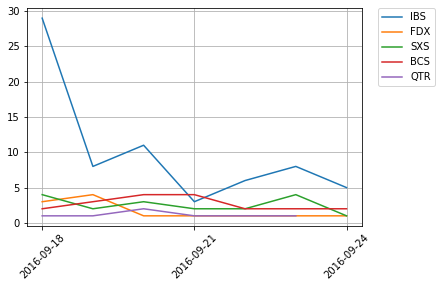

In [231]:
IBSx16 = []
IBSy16 = []

for i in range(len(IBS_dict_sort16)):
    IBSx16.append(IBS_dict_sort16[i][0])
    IBSy16.append(IBS_dict_sort16[i][1])
    
FDXx16 = []
FDXy16 = []
for i in range(len(FDX_dict_sort16)):
    FDXx16.append(FDX_dict_sort16[i][0])
    FDXy16.append(FDX_dict_sort16[i][1])
    
SXSx16 = []
SXSy16 = []
for i in range(len(SXS_dict_sort16)):
    SXSx16.append(SXS_dict_sort16[i][0])
    SXSy16.append(SXS_dict_sort16[i][1])
    
BCSx16 = []
BCSy16 = []
for i in range(len(BCS_dict_sort16)):
    BCSx16.append(BCS_dict_sort16[i][0])
    BCSy16.append(BCS_dict_sort16[i][1])
    

QTRx16 = []
QTRy16 = []
for i in range(len(QTR_dict_sort16)):
    QTRx16.append(QTR_dict_sort16[i][0])
    QTRy16.append(QTR_dict_sort16[i][1])
    
IBS_16 = plt.plot(IBSx16,IBSy16,label = 'IBS')
FDX_16 = plt.plot(FDXx16,FDXy16,label = 'FDX')
UAE_16 = plt.plot(SXSx16,SXSy16,label = 'SXS')
BCS_16 = plt.plot(BCSx16,BCSy16,label = 'BCS')
QTR_16 = plt.plot(QTRx16,QTRy16,label = 'QTR')

plt.grid(True)
plt.xticks(range(0,len(IBSx16)+1,3))

#plt.xticks(range(len(X)),X)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(handles=[IBS_])
#plt.legend([IBS_, FDX_, UAE_, BCS_, QTR_], ['IBS', 'FDX', 'UAE', 'BCS', 'QTR'])
plt.show()

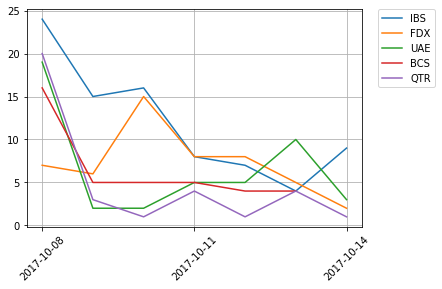

In [188]:
import matplotlib.pyplot as plt
 
x = []
y = []

for i in range(len(IBS_dict_sort)):
    x.append(IBS_dict_sort[i][0])
    y.append(IBS_dict_sort[i][1])
    
FDXx = []
FDXy = []
for i in range(len(FDX_dict_sort)):
    FDXx.append(FDX_dict_sort[i][0])
    FDXy.append(FDX_dict_sort[i][1])
    
UAEx = []
UAEy = []
for i in range(len(UAE_dict_sort)):
    UAEx.append(UAE_dict_sort[i][0])
    UAEy.append(UAE_dict_sort[i][1])
    
BCSx = []
BCSy = []
for i in range(len(BCS_dict_sort)):
    BCSx.append(BCS_dict_sort[i][0])
    BCSy.append(BCS_dict_sort[i][1])
    

QTRx = []
QTRy = []
for i in range(len(QTR_dict_sort)):
    QTRx.append(QTR_dict_sort[i][0])
    QTRy.append(QTR_dict_sort[i][1])
    

IBS_ = plt.plot(x,y,label = 'IBS')
FDX_ = plt.plot(FDXx,FDXy,label = 'FDX')
UAE_ = plt.plot(UAEx,UAEy,label = 'UAE')
BCS_ = plt.plot(BCSx,BCSy,label = 'BCS')
QTR_ = plt.plot(QTRx,QTRy,label = 'QTR')

plt.grid(True)
plt.xticks(range(0,len(UAEx)+1,3))

#plt.xticks(range(len(X)),X)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(handles=[IBS_])
#plt.legend([IBS_, FDX_, UAE_, BCS_, QTR_], ['IBS', 'FDX', 'UAE', 'BCS', 'QTR'])
plt.show()



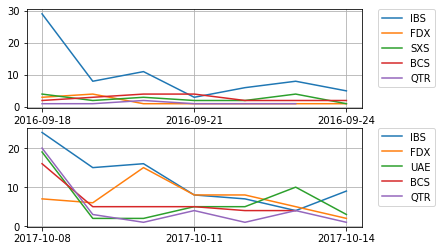

Text(0.5, 1.0, 'Top 5 Cargo Airlines in 2 years')

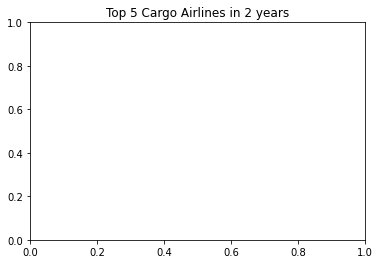

In [232]:

plt.subplot(211)
plt.plot(IBSx16,IBSy16,label = 'IBS')
plt.plot(FDXx16,FDXy16,label = 'FDX')
plt.plot(SXSx16,SXSy16,label = 'SXS')
plt.plot(BCSx16,BCSy16,label = 'BCS')
plt.plot(QTRx16,QTRy16,label = 'QTR')
plt.grid(True)
plt.xticks(range(0,len(IBSx16)+1,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplot(212)

plt.plot(x,y,label = 'IBS')
plt.plot(FDXx,FDXy,label = 'FDX')
plt.plot(UAEx,UAEy,label = 'UAE')
plt.plot(BCSx,BCSy,label = 'BCS')
plt.plot(QTRx,QTRy,label = 'QTR')
plt.grid(True)
plt.xticks(range(0,len(UAEx)+1,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()
plt.title('Top 5 Cargo Airlines in 2 years')

In [229]:
popular_pass_17_

pass_airlines = []
for index in popular_pass_17_.index:
    pass_airlines.append(popular_pass_17_.loc[index]["Callsign"])

pass_dict = {}
for key in pass_airlines:
    pass_dict[key] = pass_dict.get(key,0) + 1
#print("pass_dict:",pass_dict)

pass_dict_sort = sorted(pass_dict.items(), key=lambda d: d[1])
print(pass_dict_sort[-5:])

popular_pass_17_top5 = popular_pass_17_[popular_pass_17_.Callsign.isin(["RYR","EZY","UAL","SWA","SAS"])]

for index in popular_pass_17_top5.index:
    _date = popular_pass_17_top5.loc[index]["start"]
    dateArray = datetime.datetime.fromtimestamp(_date)
    otherStyleTime = dateArray.strftime("%Y-%m-%d")
    popular_pass_17_top5.loc[index,'start'] = otherStyleTime
    #int(time.mktime(time.strptime(otherStyleTime, "%Y-%m-%d %H:%M:%S")))
popular_pass_17_top5

[('SAS', 314), ('SWA', 325), ('UAL', 341), ('EZY', 660), ('RYR', 680)]


/Users/yimingxu/opt/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Callsign,start,type
0,EZY,2017-10-11,0
4,EZY,2017-10-11,0
8,UAL,2017-10-12,0
9,SWA,2017-10-10,0
11,RYR,2017-10-08,0
...,...,...,...
8006,RYR,2017-10-12,0
8013,SWA,2017-10-10,0
8015,EZY,2017-10-13,0
8020,EZY,2017-10-11,0


In [234]:
#popular_car_17_top1 = popular_car_17_top5[popular_car_17_top5.Callsign.isin(["IBS"])]
RYR17 = []
for index in popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["RYR"])].index:
    RYR17.append(popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["RYR"])].loc[index]["start"])

RYR17_dict = {}
for key in IBS:
    RYR17_dict[key] = RYR17_dict.get(key,0) + 1
print("RYR17_dict:",RYR17_dict)

RYR17_dict_sort = sorted(RYR17_dict.items(), key=lambda d: d[0])


EZY17 = []
for index in popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["EZY"])].index:
    EZY17.append(popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["EZY"])].loc[index]["start"])

EZY17_dict = {}
for key in EZY17:
    EZY17_dict[key] = EZY17_dict.get(key,0) + 1
print("EZY17_dict:",EZY17_dict)

EZY17_dict_sort = sorted(EZY17_dict.items(), key=lambda d: d[0])


UAL17 = []
for index in popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["UAL"])].index:
    UAL17.append(popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["UAL"])].loc[index]["start"])

UAL17_dict = {}
for key in UAL17:
    UAL17_dict[key] = UAL17_dict.get(key,0) + 1
print("UAL17_dict:",UAL17_dict)

UAL17_dict_sort = sorted(UAL17_dict.items(), key=lambda d: d[0])


SWA17 = []
for index in popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["SWA"])].index:
    SWA17.append(popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["SWA"])].loc[index]["start"])

SWA17_dict = {}
for key in SWA17:
    SWA17_dict[key] = SWA17_dict.get(key,0) + 1
print("SWA17_dict:",SWA17_dict)

SWA17_dict_sort = sorted(SWA17_dict.items(), key=lambda d: d[0])


SAS17 = []
for index in popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["SAS"])].index:
    SAS17.append(popular_pass_17_top5[popular_pass_17_top5.Callsign.isin(["SAS"])].loc[index]["start"])

SAS17_dict = {}
for key in SAS17:
    SAS17_dict[key] = SAS17_dict.get(key,0) + 1
print("SAS17_dict:",SAS17_dict)

SAS17_dict_sort = sorted(SAS17_dict.items(), key=lambda d: d[0])

RYR17_dict: {'2017-10-10': 16, '2017-10-09': 15, '2017-10-08': 24, '2017-10-12': 7, '2017-10-11': 8, '2017-10-14': 9, '2017-10-13': 4}
EZY17_dict: {'2017-10-11': 58, '2017-10-09': 106, '2017-10-13': 91, '2017-10-14': 72, '2017-10-08': 177, '2017-10-12': 92, '2017-10-10': 64}
UAL17_dict: {'2017-10-12': 41, '2017-10-10': 47, '2017-10-13': 48, '2017-10-11': 44, '2017-10-08': 79, '2017-10-14': 31, '2017-10-09': 51}
SWA17_dict: {'2017-10-10': 58, '2017-10-08': 66, '2017-10-12': 46, '2017-10-11': 36, '2017-10-14': 33, '2017-10-13': 42, '2017-10-09': 44}
SAS17_dict: {'2017-10-10': 50, '2017-10-08': 70, '2017-10-13': 44, '2017-10-12': 14, '2017-10-09': 78, '2017-10-14': 11, '2017-10-11': 47}


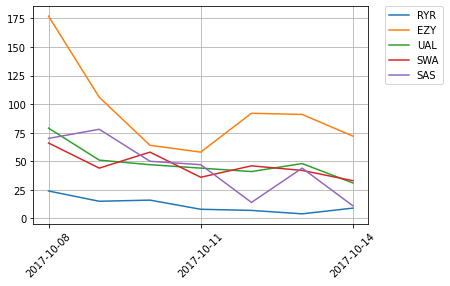

In [235]:
import matplotlib.pyplot as plt
 
RYR17x = []
RYR17y = []

for i in range(len(RYR17_dict_sort)):
    RYR17x.append(RYR17_dict_sort[i][0])
    RYR17y.append(RYR17_dict_sort[i][1])
    
EZY17x = []
EZY17y = []
for i in range(len(EZY17_dict_sort)):
    EZY17x.append(EZY17_dict_sort[i][0])
    EZY17y.append(EZY17_dict_sort[i][1])
    
UAL17x = []
UAL17y = []
for i in range(len(UAL17_dict_sort)):
    UAL17x.append(UAL17_dict_sort[i][0])
    UAL17y.append(UAL17_dict_sort[i][1])
    
SWA17x = []
SWA17y = []
for i in range(len(SWA17_dict_sort)):
    SWA17x.append(SWA17_dict_sort[i][0])
    SWA17y.append(SWA17_dict_sort[i][1])
    

SAS17x = []
SAS17y = []
for i in range(len(SAS17_dict_sort)):
    SAS17x.append(SAS17_dict_sort[i][0])
    SAS17y.append(SAS17_dict_sort[i][1])
    

plt.plot(RYR17x,RYR17y,label = 'RYR')
plt.plot(EZY17x,EZY17y,label = 'EZY')
plt.plot(UAL17x,UAL17y,label = 'UAL')
plt.plot(SWA17x,SWA17y,label = 'SWA')
plt.plot(SAS17x,SAS17y,label = 'SAS')

plt.grid(True)
plt.xticks(range(0,len(UAEx)+1,3))

#plt.xticks(range(len(X)),X)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(handles=[IBS_])
#plt.legend([IBS_, FDX_, UAE_, BCS_, QTR_], ['IBS', 'FDX', 'UAE', 'BCS', 'QTR'])
plt.show()



In [237]:
popular_pass_16_

pass_airlines16 = []
for index in popular_pass_16_.index:
    pass_airlines16.append(popular_pass_16_.loc[index]["Callsign"])

pass_dict16 = {}
for key in pass_airlines16:
    pass_dict16[key] = pass_dict16.get(key,0) + 1
#print("pass_dict:",pass_dict)

pass_dict_sort16 = sorted(pass_dict16.items(), key=lambda d: d[1])
print(pass_dict_sort16[-5:])

popular_pass_16_top5 = popular_pass_16_[popular_pass_16_.Callsign.isin(["EZY","RYR","AZA","AFR","TAP"])]

for index in popular_pass_16_top5.index:
    _date = popular_pass_16_top5.loc[index]["start"]
    dateArray = datetime.datetime.fromtimestamp(_date)
    otherStyleTime = dateArray.strftime("%Y-%m-%d")
    popular_pass_16_top5.loc[index,'start'] = otherStyleTime
    #int(time.mktime(time.strptime(otherStyleTime, "%Y-%m-%d %H:%M:%S")))
popular_pass_16_top5

[('TAP', 268), ('AFR', 282), ('AZA', 317), ('RYR', 408), ('EZY', 458)]


/Users/yimingxu/opt/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Callsign,start,type
0,RYR,2016-09-23,0
3,AZA,2016-09-18,0
4,RYR,2016-09-18,0
5,AFR,2016-09-21,0
10,RYR,2016-09-18,0
...,...,...,...
4618,AZA,2016-09-19,0
4619,RYR,2016-09-24,0
4620,EZY,2016-09-20,0
4621,EZY,2016-09-23,0


In [239]:
#popular_car_17_top1 = popular_car_17_top5[popular_car_17_top5.Callsign.isin(["IBS"])]
EZY16 = []
for index in popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["EZY"])].index:
    EZY16.append(popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["EZY"])].loc[index]["start"])

EZY16_dict = {}
for key in EZY16:
    EZY16_dict[key] = EZY16_dict.get(key,0) + 1
print("EZY16_dict:",EZY16_dict)

EZY16_dict_sort = sorted(EZY16_dict.items(), key=lambda d: d[0])


RYR16 = []
for index in popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["RYR"])].index:
    RYR16.append(popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["RYR"])].loc[index]["start"])

RYR16_dict = {}
for key in RYR16:
    RYR16_dict[key] = RYR16_dict.get(key,0) + 1
print("RYR16_dict:",RYR16_dict)

RYR16_dict_sort = sorted(RYR16_dict.items(), key=lambda d: d[0])


AZA16 = []
for index in popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["AZA"])].index:
    AZA16.append(popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["AZA"])].loc[index]["start"])

AZA16_dict = {}
for key in AZA16:
    AZA16_dict[key] = AZA16_dict.get(key,0) + 1
print("AZA16_dict:",AZA16_dict)

AZA16_dict_sort = sorted(AZA16_dict.items(), key=lambda d: d[0])


AFR16 = []
for index in popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["AFR"])].index:
    AFR16.append(popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["AFR"])].loc[index]["start"])

AFR16_dict = {}
for key in AFR16:
    AFR16_dict[key] = AFR16_dict.get(key,0) + 1
print("AFR16_dict:",AFR16_dict)

AFR16_dict_sort = sorted(AFR16_dict.items(), key=lambda d: d[0])


TAP16 = []
for index in popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["TAP"])].index:
    TAP16.append(popular_pass_16_top5[popular_pass_16_top5.Callsign.isin(["TAP"])].loc[index]["start"])

TAP16_dict = {}
for key in TAP16:
    TAP16_dict[key] = TAP16_dict.get(key,0) + 1
print("TAP16_dict:",TAP16_dict)

TAP16_dict_sort = sorted(TAP16_dict.items(), key=lambda d: d[0])

EZY16_dict: {'2016-09-18': 87, '2016-09-22': 46, '2016-09-23': 87, '2016-09-19': 54, '2016-09-21': 66, '2016-09-24': 50, '2016-09-20': 68}
RYR16_dict: {'2016-09-23': 51, '2016-09-18': 98, '2016-09-20': 68, '2016-09-22': 52, '2016-09-19': 55, '2016-09-24': 38, '2016-09-21': 46}
AZA16_dict: {'2016-09-18': 50, '2016-09-19': 40, '2016-09-20': 58, '2016-09-21': 54, '2016-09-24': 44, '2016-09-23': 60, '2016-09-22': 11}
AFR16_dict: {'2016-09-21': 50, '2016-09-18': 8, '2016-09-24': 63, '2016-09-23': 76, '2016-09-20': 62, '2016-09-19': 22, '2016-09-22': 1}
TAP16_dict: {'2016-09-21': 55, '2016-09-22': 50, '2016-09-24': 40, '2016-09-19': 22, '2016-09-23': 38, '2016-09-20': 58, '2016-09-18': 5}


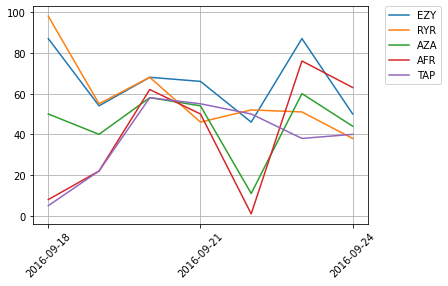

In [240]:
import matplotlib.pyplot as plt
 
EZY16x = []
EZY16y = []

for i in range(len(EZY16_dict_sort)):
    EZY16x.append(EZY16_dict_sort[i][0])
    EZY16y.append(EZY16_dict_sort[i][1])
    
RYR16x = []
RYR16y = []
for i in range(len(RYR16_dict_sort)):
    RYR16x.append(RYR16_dict_sort[i][0])
    RYR16y.append(RYR16_dict_sort[i][1])
    
AZA16x = []
AZA16y = []
for i in range(len(AZA16_dict_sort)):
    AZA16x.append(AZA16_dict_sort[i][0])
    AZA16y.append(AZA16_dict_sort[i][1])
    
AFR16x = []
AFR16y = []
for i in range(len(AFR16_dict_sort)):
    AFR16x.append(AFR16_dict_sort[i][0])
    AFR16y.append(AFR16_dict_sort[i][1])
    

TAP16x = []
TAP16y = []
for i in range(len(TAP16_dict_sort)):
    TAP16x.append(TAP16_dict_sort[i][0])
    TAP16y.append(TAP16_dict_sort[i][1])
    

plt.plot(EZY16x,EZY16y,label = 'EZY')
plt.plot(RYR16x,RYR16y,label = 'RYR')
plt.plot(AZA16x,AZA16y,label = 'AZA')
plt.plot(AFR16x,AFR16y,label = 'AFR')
plt.plot(TAP16x,TAP16y,label = 'TAP')

plt.grid(True)
plt.xticks(range(0,len(UAEx)+1,3))

#plt.xticks(range(len(X)),X)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(handles=[IBS_])
#plt.legend([IBS_, FDX_, UAE_, BCS_, QTR_], ['IBS', 'FDX', 'UAE', 'BCS', 'QTR'])
plt.show()



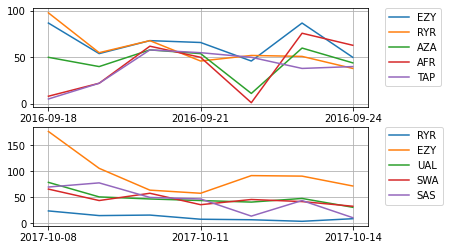

Text(0.5, 1.0, 'Top 5 Cargo Airlines in 2 years')

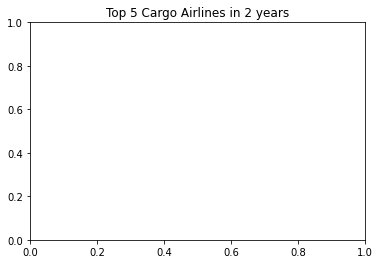

In [242]:

plt.subplot(212)
plt.plot(RYR17x,RYR17y,label = 'RYR')
plt.plot(EZY17x,EZY17y,label = 'EZY')
plt.plot(UAL17x,UAL17y,label = 'UAL')
plt.plot(SWA17x,SWA17y,label = 'SWA')
plt.plot(SAS17x,SAS17y,label = 'SAS')
plt.grid(True)
plt.xticks(range(0,len(RYR17x)+1,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplot(211)

plt.plot(EZY16x,EZY16y,label = 'EZY')
plt.plot(RYR16x,RYR16y,label = 'RYR')
plt.plot(AZA16x,AZA16y,label = 'AZA')
plt.plot(AFR16x,AFR16y,label = 'AFR')
plt.plot(TAP16x,TAP16y,label = 'TAP')
plt.grid(True)
plt.xticks(range(0,len(EZY16x)+1,3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()
plt.title('Top 5 Cargo Airlines in 2 years')

In [244]:
car_airlinesall = car_airlines16 + car_airlines

In [246]:
car_airlinesall

all_cargo_dict = {}
for key in car_airlinesall:
    all_cargo_dict[key] = all_cargo_dict.get(key,0) + 1
#print("pass_dict:",pass_dict)

all_cargo_dict = sorted(all_cargo_dict.items(), key=lambda d: d[1])

# Airports Cargo volume

In [6]:
import time, datetime
import pandas as pd

airports_volume_csv16 = pd.read_csv('2016_airports_with_position.csv') 



airports_cargo_16 = airports_volume_csv16[airports_volume_csv16.type.isin(["1"])]
airports_cargo_16_ = airports_cargo_16[["Name_s","Name_e"]]


portscargo = []
for index in airports_cargo_16_.index:
    if airports_cargo_16_.loc[index]["Name_s"] != airports_cargo_16_.loc[index]["Name_e"]:
        portscargo.append(airports_cargo_16_.loc[index]["Name_s"])
        portscargo.append(airports_cargo_16_.loc[index]["Name_e"])
        
carports_dict16 = {}
for key in portscargo:
    carports_dict16[key] = carports_dict16.get(key,0) + 1
print("carports_dict16:",carports_dict16)

carports_dict_sort16 = sorted(carports_dict16.items(), key=lambda d: d[1])
carports_dict_sort16[-10:]

carports_dict16: {'Amsterdam Airport Schiphol': 11, 'Adolfo Suárez Madrid–Barajas Airport': 29, 'Flugplatz Saarmund': 3, 'Lampedusa Airport': 1, 'Vienna International Airport': 1, 'Aérodrome de Belle Île': 1, 'Aeródromo Loring': 9, 'Leverkusen Airport': 2, 'Enghien Moisselles Airfield': 12, 'London Heathrow Airport': 9, 'Melilla Airport': 2, 'Bunge Private Airport': 1, 'Düsseldorf Airport': 5, 'Nuremberg Airport': 1, 'London Stansted Airport': 2, 'Hunsdon Airfield': 4, 'Mönchengladbach Airport': 5, 'Frankfurt am Main Airport': 3, 'Charles de Gaulle International Airport': 3, 'Cologne Bonn Airport': 7, 'Hamburg Helmut Schmidt Airport': 4, 'Saarbrücken Airport': 1, 'Paris-Le Bourget Airport': 7, 'Rush Green Airstrip': 2, 'Redhill Aerodrome': 2, 'Texel Airfield': 3, 'De Kooy Airport': 3, 'Thisted Airport': 2, 'Großes Moor Airfield': 2, 'Oslo Airport, Gardermoen': 2, 'Essen Mulheim Airport': 4, 'London Luton Airport': 1, 'Fresh Breeze UL': 1, 'Villacoublay-Vélizy (BA 107) Air Base': 3, 'To

[('Essen Mulheim Airport', 4),
 ('Düsseldorf Airport', 5),
 ('Mönchengladbach Airport', 5),
 ('Cologne Bonn Airport', 7),
 ('Paris-Le Bourget Airport', 7),
 ('Aeródromo Loring', 9),
 ('London Heathrow Airport', 9),
 ('Amsterdam Airport Schiphol', 11),
 ('Enghien Moisselles Airfield', 12),
 ('Adolfo Suárez Madrid–Barajas Airport', 29)]

In [7]:
import time, datetime
import pandas as pd

airports_volume_csv17 = pd.read_csv('2017_airports_with_position.csv') 



airports_cargo_17 = airports_volume_csv17[airports_volume_csv17.type.isin(["1"])]
airports_cargo_17_ = airports_cargo_17[["Name_s","Name_e"]]


portscargo17 = []
for index in airports_cargo_17_.index:
    if airports_cargo_17_.loc[index]["Name_s"] != airports_cargo_17_.loc[index]["Name_e"]:
        portscargo17.append(airports_cargo_17_.loc[index]["Name_s"])
        portscargo17.append(airports_cargo_17_.loc[index]["Name_e"])
        
carports_dict17 = {}
for key in portscargo17:
    carports_dict17[key] = carports_dict17.get(key,0) + 1
print("carports_dict17:",carports_dict17)

carports_dict_sort17 = sorted(carports_dict17.items(), key=lambda d: d[1])
carports_dict_sort17[-10:]

carports_dict17: {'Domodedovo International Airport': 4, 'Frankfurt am Main Airport': 17, 'Kyzyl-Mazhalyk Airport': 5, 'Aérodrome de Meaux-Esbly': 7, 'Warsaw Chopin Airport': 2, 'Leipzig/Halle Airport': 26, 'Adolfo Suárez Madrid–Barajas Airport': 43, 'Ellistown Airstrip': 1, 'Sheremetyevo International Airport': 4, 'Vallentuna flygfält': 2, 'Helsinki Vantaa Airport': 3, 'Lavrentiya Airport': 38, '[double:] Kulmbach': 10, 'Akhty Airfield': 37, 'Manchester Airport': 4, 'Amsterdam Airport Schiphol': 16, 'Ses Salines (S’Olivó) Airfield': 1, "Perugia San Francesco d'Assisi – Umbria International Airport": 1, 'Liège Airport': 5, 'Uglovaya Air Base': 8, 'Edinburgh Airport': 1, 'Vienna International Airport': 3, 'EuroAirport Basel-Mulhouse-Freiburg Airport': 4, 'Full Sutton Airfield': 1, 'Elvington Airfield': 1, 'Cologne Bonn Airport': 15, 'Campo di Volo Palosco': 3, 'Cameri Air Base [MIL]': 6, 'Preobrazheniye Airport': 9, 'Toulouse-Blagnac Airport': 1, 'Patreksfjörður Airport': 9, 'London Gat

[('London Heathrow Airport', 11),
 ('Le Plessis-Belleville Airfield', 12),
 ('Cologne Bonn Airport', 15),
 ('Amsterdam Airport Schiphol', 16),
 ('Frankfurt am Main Airport', 17),
 ('Leipzig/Halle Airport', 26),
 ('Corvo Airport', 33),
 ('Akhty Airfield', 37),
 ('Lavrentiya Airport', 38),
 ('Adolfo Suárez Madrid–Barajas Airport', 43)]

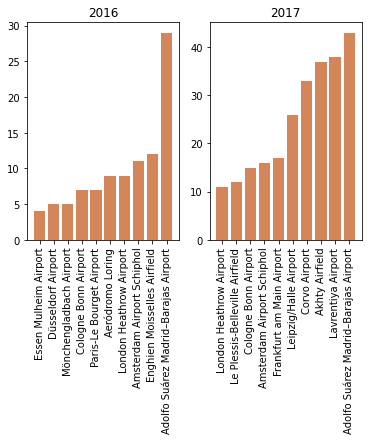

In [51]:
[('Essen Mulheim Airport', 4),
 ('Düsseldorf Airport', 5),
 ('Mönchengladbach Airport', 5),
 ('Cologne Bonn Airport', 7),
 ('Paris-Le Bourget Airport', 7),
 ('Aeródromo Loring', 9),
 ('London Heathrow Airport', 9),
 ('Amsterdam Airport Schiphol', 11),
 ('Enghien Moisselles Airfield', 12),
 ('Adolfo Suárez Madrid–Barajas Airport', 29)]
import matplotlib.pyplot as plt
 
name_list = ['Essen Mulheim Airport','Düsseldorf Airport','Mönchengladbach Airport','Cologne Bonn Airport','Paris-Le Bourget Airport','Aeródromo Loring','London Heathrow Airport','Amsterdam Airport Schiphol','Enghien Moisselles Airfield','Adolfo Suárez Madrid–Barajas Airport']
num_list = [4,5,5,7,7,9,9,11,12,29]
name_list2 = ['London Heathrow Airport','Le Plessis-Belleville Airfield','Cologne Bonn Airport','Amsterdam Airport Schiphol','Frankfurt am Main Airport','Leipzig/Halle Airport','Corvo Airport','Akhty Airfield','Lavrentiya Airport','Adolfo Suárez Madrid–Barajas Airport']
num_list2 = [11,12,15,16,17,26,33,37,38,43]

fig, axs = plt.subplots(1, 2)
plt.xticks(rotation=90)

axs[0].bar(range(len(num_list)), num_list,color='#d5855a',tick_label=name_list)
axs[1].bar(range(len(num_list2)), num_list2,color='#d5855a',tick_label=name_list2)

axs[0].set_xticklabels(name_list, rotation=90)


axs[0].set_title("2016")
axs[1].set_title("2017")



plt.show()

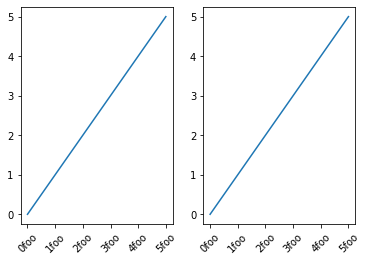

In [43]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(ncols=2)
for i in range(2):
    ax = axs[i]
    ax.set_xticks(range(6))
    ax.set_xticklabels([str(x)+"foo" for x in range(6)], rotation=45)
    ax.plot(range(6), range(6))
plt.show()